In [69]:
import pandas as pd
import numpy as np
import warnings


In [23]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis(EDA)

In [24]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [28]:
df['Car_Name'].nunique()

98

In [29]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [30]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
df['Owner'].unique() 

array([0, 1, 3], dtype=int64)

In [33]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [34]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

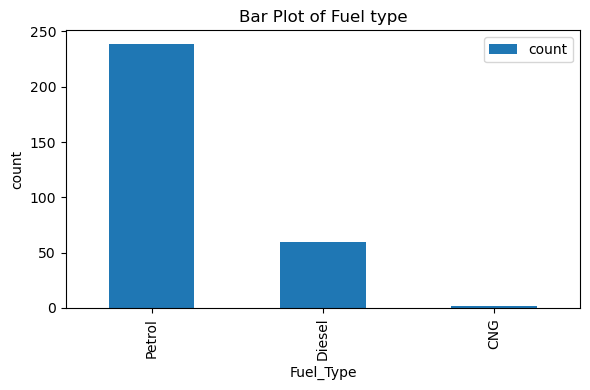

In [35]:
import matplotlib.pyplot as plt
# bar Plotting
fuel_type=df["Fuel_Type"].value_counts()
fuel_type.plot(kind='bar', figsize=(6,4))

# Adding labels and title
plt.xlabel('Fuel_Type')
plt.ylabel('count')
plt.title('Bar Plot of Fuel type')

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

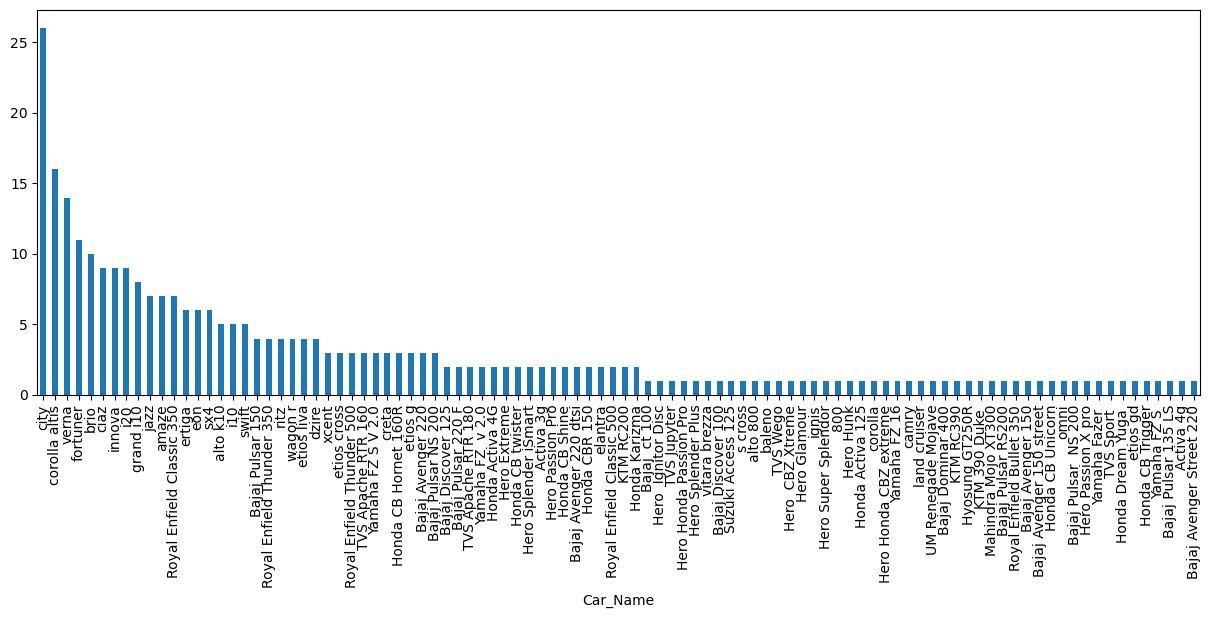

In [36]:
# Count of diff types of car
cars= df['Car_Name'].value_counts()
cars.plot(kind='bar', figsize=(15,5))
plt.show()

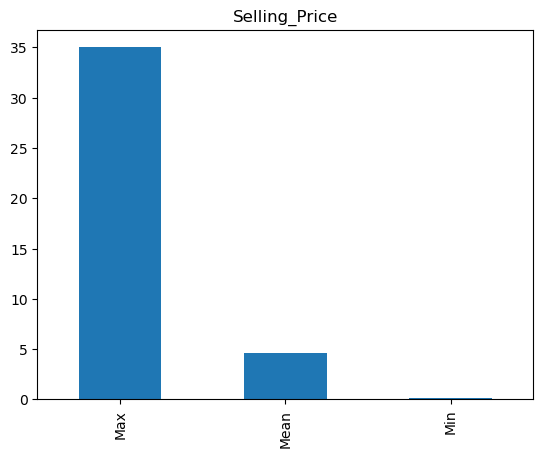

In [37]:
# Calculate the max, mean, and min selling prices
max_price = df['Selling_Price'].max()
mean_price = df['Selling_Price'].mean()
min_price = df['Selling_Price'].min()

# Create a DataFrame or Series with these values
ave_selling_price = pd.Series([max_price, mean_price, min_price], index=['Max', 'Mean', 'Min'])
ave_selling_price.plot(kind='bar')
plt.title('Selling_Price')
plt.show()

# Machine Learning(ML)

In [61]:
from sklearn.preprocessing import LabelEncoder

# Select the required columns
required_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
new_df = df[required_columns].copy()
# Initialize LabelEncoders for each column
label_encoders = {col: LabelEncoder().fit(df[col]) for col in required_columns}

# Encode the training data
df_encoded = df[required_columns].apply(lambda col: label_encoders[col.name].transform(col))

# Check the encoded DataFrame
print(df_encoded.head())



   Car_Name  Fuel_Type  Selling_type  Transmission
0        90          2             0             1
1        93          1             0             1
2        68          2             0             1
3        96          2             0             1
4        92          1             0             1


In [47]:
new_df1 = df.drop(columns=required_columns)
new_df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [48]:
final_df = pd.concat([new_df1, df_encoded], axis=1)
final_df.head(5)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = final_df.drop(columns=['Selling_Price'])
y = final_df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [50]:
X

,Year,Present_Price,Driven_kms,Owner,Car_Name,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,0,90,2,0,1
1,2013,9.54,43000,0,93,1,0,1
2,2017,9.85,6900,0,68,2,0,1
3,2011,4.15,5200,0,96,2,0,1
4,2014,6.87,42450,0,92,1,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,69,1,0,1
297,2015,5.90,60000,0,66,2,0,1
298,2009,11.00,87934,0,69,2,0,1
299,2017,12.50,9000,0,69,1,0,1


In [51]:
from sklearn.model_selection import train_test_split

# Standardizing the features with StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
y_pred_svr = model.predict(X_test)

# Check the predictions
print("Predicted values:",y_pred_svr)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Mean Squared Error_SVR:", mse)
print("Mean Absolute Error_SVR:", mae)
print("R-squared_SVR:", r2)


Predicted values: [ 0.48856738  8.36145499  4.84680983  0.29072049  8.09542441  6.55810216
  0.78144854  1.00621681  0.63121307  6.48004256  7.14516538  0.55012055
  6.71326775  0.76777801  5.39917058  3.11734832  0.76702943  9.9641969
  0.93226216  1.65406132  0.48587204  7.23484791  4.94094613  2.70566096
  0.48997065  3.57188929  4.92056052  2.67573888  1.23433794  1.03559736
  0.45123203  7.88273314  0.56175775  2.14206835  7.62575014  4.47975723
  6.26671768  4.74395733  3.04720372  5.5742545   2.61824088  2.74907216
  4.42077286  0.53176334  6.14134068  0.40694816  7.18870699  5.7057674
  3.27970881  4.08654399  5.67931198  1.31504614 12.89118528 12.59154387
  6.11284057  7.93587668  4.85891989  8.07530866  1.79210968  6.64560678
  0.28726526]
Mean Squared Error_SVR: 5.070875742972697
Mean Absolute Error_SVR: 1.0037651597517554
R-squared_SVR: 0.7798677199397237


In [67]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dtr = model.predict(X_test)

# Check the predictions
print("Predicted values:", y_pred_dtr)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)

print("Mean Squared Error_DTR:", mse)
print("Mean Absolute Error_DTR:", mae)
print("R-squared_DTR:", r2)

Predicted values: [ 0.5   9.15  4.1   0.2   7.05  5.95  1.11  0.4   0.5   7.2   9.25  1.11
  7.5   0.45  4.75  2.35  1.1  19.75  0.48  1.75  0.25  8.75  4.5   2.7
  0.45  3.1   5.25  2.9   1.15  1.25  0.25  8.5   0.45  2.25  7.75  3.9
  5.85  7.45  2.55  7.05  3.49  3.35  5.3   0.6   6.5   0.65  8.5   4.35
  3.1   3.1   4.75  1.65 23.   20.75  5.95  9.15  5.25  8.75  3.    6.4
  0.25]
Mean Squared Error_DTR: 1.0316901639344263
Mean Absolute Error_DTR: 0.6231147540983606
R-squared_DTR: 0.9552131979535535


In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_rfr = model.predict(X_test)

# Check the predictions
print("Predicted values:",y_pred_rfr)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error_RFR:", mse)
print("Mean Absolute Error_RFR:", mae)
print("R-squared_RFR:", r2)


Predicted values: [ 0.4371 10.1364  4.8775  0.2027  7.7878  6.6105  1.1207  0.8062  0.4721
  6.53    8.4645  1.1177  7.8294  0.454   5.3195  2.6075  1.1345 13.88
  0.4726  1.5396  0.3381  7.8478  4.758   2.827   0.5071  3.4255  5.2845
  3.089   1.1776  1.1546  0.3896  8.4968  0.4703  2.581   7.7394  4.1565
  6.405   6.4718  2.4795  6.8198  5.6496  3.6009  4.9195  0.553   6.0605
  0.7951  7.8435  6.4605  2.8755  3.4285  5.0205  1.5006 22.21   20.4545
  6.21   10.009   5.1225  8.8214  2.908   6.612   0.2477]
Mean Squared Error_RFR: 0.9352101747540995
Mean Absolute Error_RFR: 0.6233278688524596
R-squared_RFR: 0.9594015001472896


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle 

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
GBR.fit(X_train, y_train)
y_pred_gbr = GBR.predict(X_test)

# Check the predictions
print("Predicted values:", y_pred_gbr)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print("Mean Squared Error_GBR:", mse)
print("Mean Absolute Error_GBR:", mae)
print("R-squared_GBR:", r2)


# pickle the model

with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

Predicted values: [ 0.59420236 10.51301286  4.72727586  0.2574113   8.30229681  6.91464332
  1.15327988  0.72275911  0.4991535   6.64098258  8.58840429  0.93669799
  7.34005014  0.56505796  5.51757028  2.20864148  1.13029304 13.95545406
  0.50010501  1.40783334  0.43258779  8.49548117  5.23450663  2.81355692
  0.61910413  3.89533383  5.31065997  3.21780686  1.25010294  1.28384051
  0.59884299  8.783421    0.32849074  2.74837565  7.95915318  4.12005132
  6.30885368  4.38436338  2.66234701  5.79706622  3.91261518  2.68405199
  4.28470006  0.57190777  6.92100739  0.64028258  8.36415842  7.73997253
  2.66801983  4.03458182  5.43262574  1.28568279 20.66174725 23.61992556
  6.96807505  9.80436714  4.91326609  8.86915523  2.64118973  7.42879074
  0.26887419]
Mean Squared Error_GBR: 0.7343304667956739
Mean Absolute Error_GBR: 0.5478305377517304
R-squared_GBR: 0.9681219086865862


In [56]:
## Load the model from the file
with open('gbr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
loaded_y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
loaded_mse = mean_squared_error(y_test, loaded_y_pred)
loaded_mae = mean_absolute_error(y_test, loaded_y_pred)
loaded_r2 = r2_score(y_test, loaded_y_pred)

print("Loaded Model Mean Squared Error:", loaded_mse)
print("Loaded Model Mean Absolute Error:", loaded_mae)
print("Loaded Model R-squared:", loaded_r2)


Loaded Model Mean Squared Error: 0.7343304667956739
Loaded Model Mean Absolute Error: 0.5478305377517304
Loaded Model R-squared: 0.9681219086865862


# Make prediction with new data

In [70]:
# Sample data
sample = np.array([['ritz', 2017, 5.59, 4300, 'Petrol', 'Dealer', 'Manual', 0]])

# Encode the sample data using encoders
sample_encoded = np.column_stack([
    label_encoders['Car_Name'].transform(sample[:, 0]),
    sample[:, 1].astype(float),
    sample[:, 2].astype(float),
    sample[:, 3].astype(float),
    label_encoders['Fuel_Type'].transform(sample[:, 4]),
    label_encoders['Selling_type'].transform(sample[:, 5]),
    label_encoders['Transmission'].transform(sample[:, 6]),
    sample[:, 7].astype(float)
])

# Reshape sample_encoded to match the expected input shape
sample_encoded = sample_encoded.reshape(1, -1)

# Transform the sample using the fitted scaler
sample_scaled = scaler.transform(sample_encoded)

# Predict the car selling price
new_pred = GBR.predict(sample_scaled)

print('Predicted car selling price:', new_pred)


Predicted car selling price: [23.86799206]


C:\Users\HP\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
